In [1]:
from os import listdir
from matplotlib import pyplot as pl
import pandas as pd
import numpy as np

from scipy import stats

import warnings

warnings.filterwarnings(action='once')

In [2]:
path = "./selected_raw_data/"

In [9]:
# edge = 1 -> rising
# edge = 0 -> falling
def zero_crosses(data, edge):
    if edge==1:
        return np.logical_and((data[:-1]*data[1:] < 0), (data[1:] < 0))
    elif edge==0:
        return np.logical_and((data[:-1]*data[1:] < 0), (data[1:] > 0))

## Import data
Steps for each file :
- print filename (useful to access data later)
- create a dataframe from the values inside the file
- clean timestamp in order to get a column indicating the elapsed time in seconds

In [4]:
data ={}
for f in listdir(path):
    if 'lud' in f or 'A' in f:
        continue
    data[f] = pd.read_csv(path+f)
    start_time = data[f]["timestamp"][0]
    data[f]["timestamp"] = (data[f]["timestamp"]-start_time)/1000

c:\users\ludivine\anaconda2\envs\server\lib\site-packages\pandas\plotting\_core.py:1716: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  series.name = label


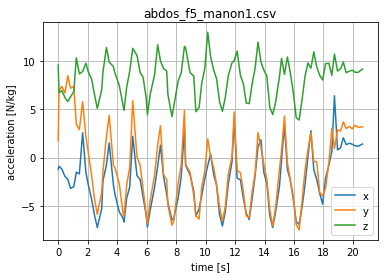

x zero crossing : 10
y zero crossing : 9
x and y zero crossing : 7


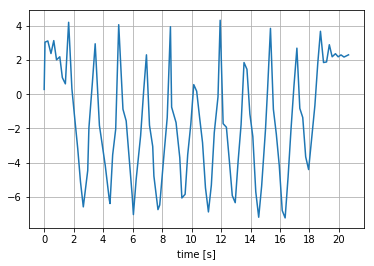

m zero crossing : 10


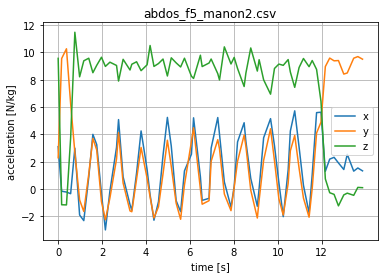

x zero crossing : 11
y zero crossing : 10
x and y zero crossing : 5


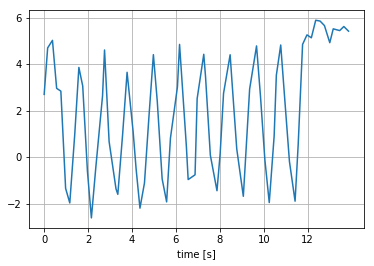

m zero crossing : 10


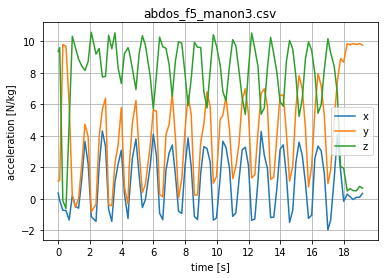

x zero crossing : 18
y zero crossing : 4
x and y zero crossing : 4


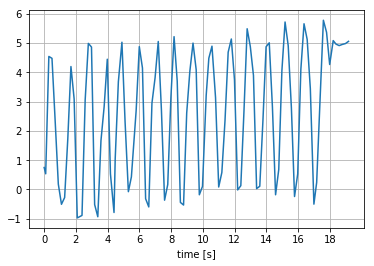

m zero crossing : 13


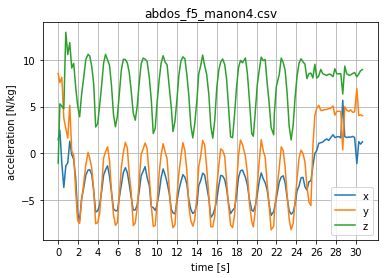

x zero crossing : 3
y zero crossing : 13
x and y zero crossing : 0


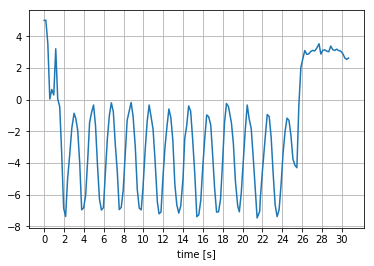

m zero crossing : 1


In [34]:
for f in data:
    if "abdos" in f:
        data[f].plot(x="timestamp", y=['x', 'y', 'z'], kind='line', title=f, grid=True)
        pl.ylabel('acceleration [N/kg]')
        pl.xlabel('time [s]')
        pl.xticks(np.arange(min(data[f]["timestamp"]), max(data[f]["timestamp"]), step=2))
        pl.show()
        
        x = np.array(data[f]['x'])
        y = np.array(data[f]['y'])
        x_zeros = zero_crosses(x, 1)
        y_zeros = zero_crosses(y, 1)
        
        xy_zeros = np.logical_and(x_zeros, y_zeros)
        print('x zero crossing : ' +str(x_zeros.sum()))
        print('y zero crossing : ' +str(y_zeros.sum()))
        print('x and y zero crossing : ' +str(xy_zeros.sum()))
        
        m = []
        for i in range(len(data[f]['x'])):
            m.append((data[f]['x'][i] + data[f]['y'][i])/2)
        
        pl.plot(data[f]['timestamp'], m)
        pl.xlabel('time [s]')
        pl.xticks(np.arange(min(data[f]["timestamp"]), max(data[f]["timestamp"]), step=2))
        pl.grid()
        pl.show()
        
        #m[:] = [x+6 for x in m]
        m_zeros = zero_crosses(np.array(m), 1)
        print('m zero crossing : ' +str(m_zeros.sum()))

c:\users\ludivine\anaconda2\envs\server\lib\site-packages\pandas\plotting\_core.py:1716: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  series.name = label


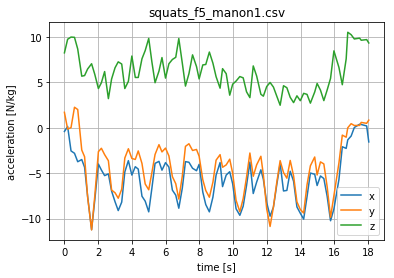

x zero crossing : 9
y zero crossing : 12
x and y zero crossing : 2


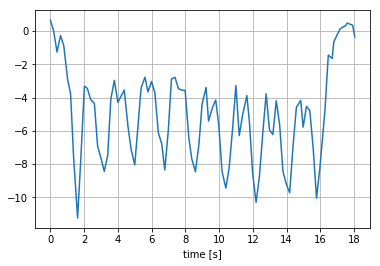

m zero crossing : 11


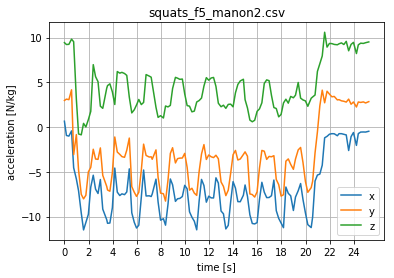

x zero crossing : 17
y zero crossing : 9
x and y zero crossing : 7


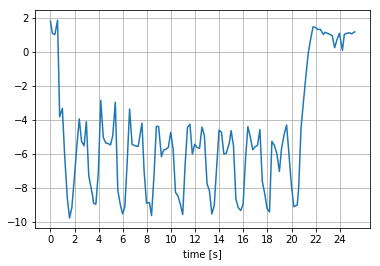

m zero crossing : 13


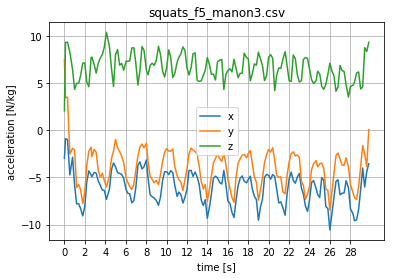

x zero crossing : 12
y zero crossing : 12
x and y zero crossing : 4


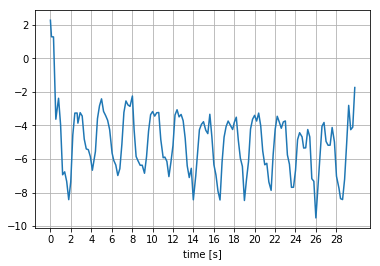

m zero crossing : 12


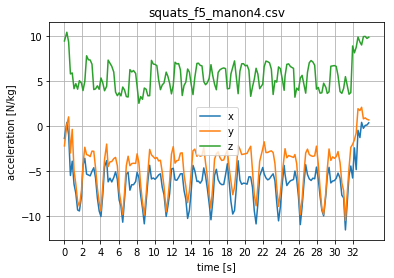

x zero crossing : 13
y zero crossing : 13
x and y zero crossing : 9


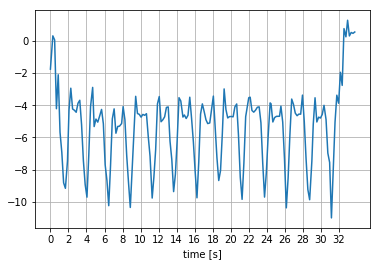

m zero crossing : 13


In [32]:
for f in data:
    if "squats" in f:
        data[f].plot(x="timestamp", y=['x', 'y', 'z'], kind='line', title=f, grid=True)
        pl.ylabel('acceleration [N/kg]')
        pl.xlabel('time [s]')
        pl.xticks(np.arange(min(data[f]["timestamp"]), max(data[f]["timestamp"]), step=2))
        pl.show()
        
        x = np.array(data[f]['x']) + 7.5
        y = np.array(data[f]['y']) + 5
        x_zeros = zero_crosses(x, 1)
        y_zeros = zero_crosses(y, 1)
        
        xy_zeros = np.logical_and(x_zeros, y_zeros)
        print('x zero crossing : ' +str(x_zeros.sum()))
        print('y zero crossing : ' +str(y_zeros.sum()))
        print('x and y zero crossing : ' +str(xy_zeros.sum()))
        
        m = []
        for i in range(len(data[f]['x'])):
            m.append((data[f]['x'][i] + data[f]['y'][i])/2)
        
        pl.plot(data[f]['timestamp'], m)
        pl.xlabel('time [s]')
        pl.xticks(np.arange(min(data[f]["timestamp"]), max(data[f]["timestamp"]), step=2))
        pl.grid()
        pl.show()
        
        m[:] = [x+6 for x in m]
        m_zeros = zero_crosses(np.array(m), 1)
        print('m zero crossing : ' +str(m_zeros.sum()))

c:\users\ludivine\anaconda2\envs\server\lib\site-packages\pandas\plotting\_core.py:1716: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  series.name = label


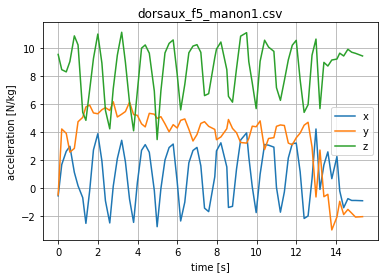

x zero crossing : 12
z zero crossing : 11
x and z zero crossing : 8


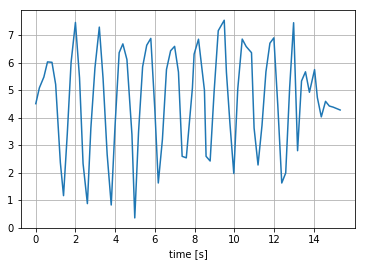

m zero crossing : 11


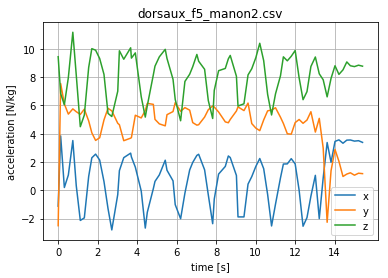

x zero crossing : 9
z zero crossing : 10
x and z zero crossing : 6


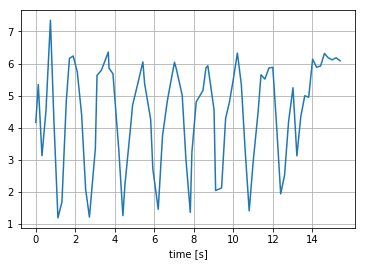

m zero crossing : 10


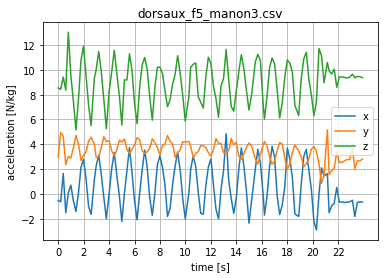

x zero crossing : 19
z zero crossing : 16
x and z zero crossing : 13


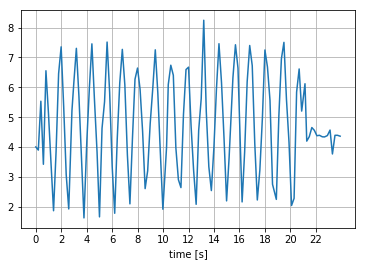

m zero crossing : 19


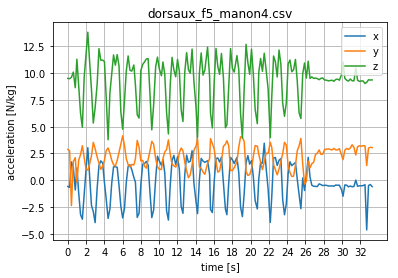

x zero crossing : 20
z zero crossing : 16
x and z zero crossing : 7


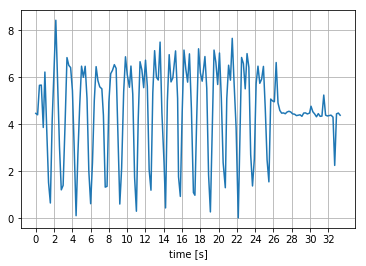

m zero crossing : 18


In [29]:
for f in data:
    if "dorsaux" in f:
        data[f].plot(x="timestamp", y=['x', 'y', 'z'], kind='line', title=f, grid=True)
        pl.ylabel('acceleration [N/kg]')
        pl.xlabel('time [s]')
        pl.xticks(np.arange(min(data[f]["timestamp"]), max(data[f]["timestamp"]), step=2))
        pl.show()
        
        x = np.array(data[f]['x'])
        z = np.array(data[f]['z'])-8
        
        x_zeros = zero_crosses(x, 1)
        z_zeros = zero_crosses(z, 1)
        
        xz_zeros = np.logical_and(x_zeros, z_zeros)
        print('x zero crossing : ' +str(x_zeros.sum()))
        print('z zero crossing : ' +str(z_zeros.sum()))
        print('x and z zero crossing : ' +str(xz_zeros.sum()))
        
        m = []
        for i in range(len(data[f]['x'])):
            m.append((data[f]['x'][i] + data[f]['z'][i])/2)
        
        pl.plot(data[f]['timestamp'], m)
        pl.xlabel('time [s]')
        pl.xticks(np.arange(min(data[f]["timestamp"]), max(data[f]["timestamp"]), step=2))
        pl.grid()
        pl.show()
        
        m[:] = [x-4 for x in m]
        m_zeros = zero_crosses(np.array(m), 1)
        print('m zero crossing : ' +str(m_zeros.sum()))

c:\users\ludivine\anaconda2\envs\server\lib\site-packages\pandas\plotting\_core.py:1716: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  series.name = label


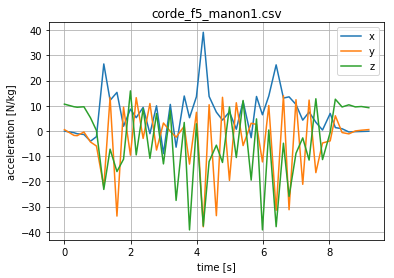

x zero crossing : 5
y zero crossing : 17
z zero crossing : 12


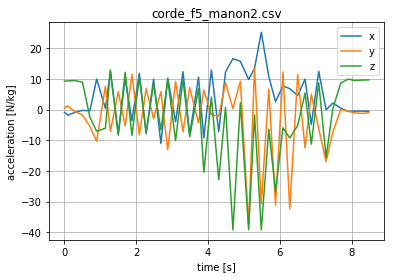

x zero crossing : 11
y zero crossing : 15
z zero crossing : 13


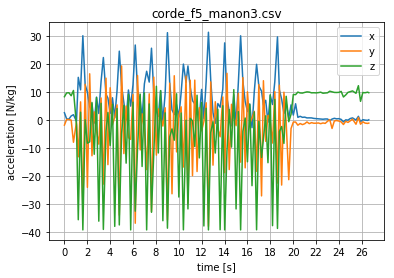

x zero crossing : 14
y zero crossing : 44
z zero crossing : 36


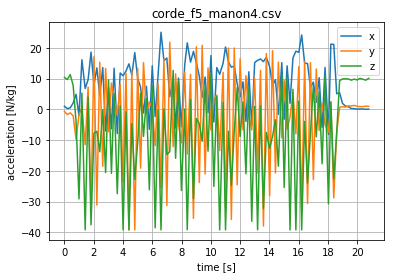

x zero crossing : 17
y zero crossing : 41
z zero crossing : 31


In [8]:
for f in data:
    if "corde" in f:
        data[f].plot(x="timestamp", y=['x', 'y', 'z'], kind='line', title=f, grid=True)
        pl.ylabel('acceleration [N/kg]')
        pl.xlabel('time [s]')
        pl.xticks(np.arange(min(data[f]["timestamp"]), max(data[f]["timestamp"]), step=2))
        pl.show()
        
        x = np.array(data[f]['x'])
        y = np.array(data[f]['y'])
        z = np.array(data[f]['z'])
        print('x zero crossing : ' +str(zero_crosses(x, 0)))
        print('y zero crossing : ' +str(zero_crosses(y, 0)))
        print('z zero crossing : ' +str(zero_crosses(z, 0)))